In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [3]:

df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


### The total_days represents the total amount of time
### each student has spent in classroom.


In [4]:
# Get the average classroom time for the control group
control_mean = df[df['group'] == 'control']['total_days'].mean()

# Get the average classroom time for the experiment group
experiment_mean = df[df['group'] == 'experiment']['total_days'].mean()

# Display average classroom time for each group
print('Control group average classroom time:', control_mean)
print('Experiment group average classroom time:', experiment_mean)


Control group average classroom time: 73.3689903846
Experiment group average classroom time: 74.6715935335


In [5]:
# Compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [6]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
for _ in range(10000):
    sample = df.sample(df.shape[0], replace=True)
    control_mean = sample[sample['group'] == 'control']['total_days'].mean()
    experiment_mean = sample[sample['group'] == 'experiment']['total_days'].mean()
    diffs.append(experiment_mean - control_mean)



In [8]:
# convert to numpy array
diffs = np.array(diffs)
diffs

array([ 2.01207354,  0.40568571,  2.05275098, ...,  1.65193758,
        1.80970221,  0.54353631])

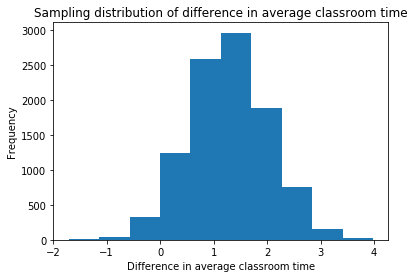

In [10]:
# plot sampling distribution
plt.hist(diffs)
plt.xlabel('Difference in average classroom time')
plt.ylabel('Frequency')
plt.title('Sampling distribution of difference in average classroom time')
plt.show()

In [11]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(diffs), len(diffs))


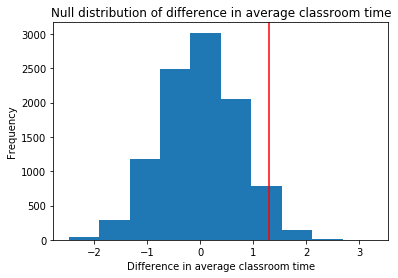

In [12]:
# plot null distribution
plt.hist(null_vals)
plt.xlabel('Difference in average classroom time')
plt.ylabel('Frequency')
plt.title('Null distribution of difference in average classroom time')
# plot line for observed statistic
plt.axvline(x=obs_diff, color='red')
plt.show()

In [13]:
# compute p value
p_value = (null_vals > obs_diff).mean()
print('P value:', p_value)

P value: 0.0384


>### We have evidence, with a type I error rate of 0.05, that users spend more time in the classroom after seeing the experimental description 

> Even if the increase in classroom time is statistically significant, engaging students for 1.3 more days in the classroom, when they average around 74 days in total, doesn't seem to indicate a large enough value to launch this change from a practical perspective.